# Curvature Filter 

#### Python implementation of Curvature Filter.

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

def update_Bern(img, row, col):
    img_ij = img[row:-1:2, col:-1:2]
    img_prev = img[row - 1:-2:2, col:-1:2]; img_next = img[row + 1::2, col:-1:2]
    img_left = img[row:-1:2, col - 1:-2:2]; img_rigt = img[row:-1:2, col + 1::2]

    d1 = (img_prev + img_next)/2.0 - img_ij; d2 = (img_left + img_rigt)/2.0 - img_ij
    d_m = d1 * (np.abs(d1) <= np.abs(d2)) + d2 * (np.abs(d2) < np.abs(d1))
    img_ij[...] += d_m
    
def update_MC(img, row, col):
    img_ij = img[row:-1:2, col:-1:2]; img_ij8 = 8*img_ij
    img_prev = img[row - 1:-2:2, col:-1:2]; img_next = img[row + 1::2, col:-1:2]
    img_left = img[row:-1:2, col - 1:-2:2]; img_rigt = img[row:-1:2, col + 1::2]
    img_leUp = img[row - 1:-2:2, col - 1:-2:2]; img_riUp = img[row - 1:-2:2, col + 1::2];
    img_leDn = img[row + 1::2, col - 1:-2:2]; img_riDn = img[row + 1::2, col + 1::2];

    d1 = 2.5 * (img_prev + img_next) + 5.0 * img_rigt - img_riUp - img_riDn - img_ij8;
    d2 = 2.5 * (img_prev + img_next) + 5.0 * img_left - img_leUp - img_leDn - img_ij8;
    d3 = 2.5 * (img_left + img_rigt) + 5.0 * img_prev - img_leUp - img_riUp - img_ij8;
    d4 = 2.5 * (img_left + img_rigt) + 5.0 * img_next - img_leDn - img_riDn - img_ij8;
    
    d = d1 * (np.abs(d1) <= np.abs(d2)) + d2 * (np.abs(d2) < np.abs(d1))
    d = d * (np.abs(d) <= np.abs(d3)) + d3 * (np.abs(d3) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d4)) + d4 * (np.abs(d4) < np.abs(d))
    
    d /= 8
    
    img_ij[...] += d
    
def update_GC(img, row, col):
    img_ij = img[row:-1:2, col:-1:2]; # 从row到-1行，每隔两个位置取1一个数，默认为最后一行
    img_prev = img[row - 1:-2:2, col:-1:2]; img_next = img[row + 1::2, col:-1:2]
    img_left = img[row:-1:2, col - 1:-2:2]; img_rigt = img[row:-1:2, col + 1::2]
    img_leUp = img[row - 1:-2:2, col - 1:-2:2]; img_riUp = img[row - 1:-2:2, col + 1::2];
    img_leDn = img[row + 1::2, col - 1:-2:2]; img_riDn = img[row + 1::2, col + 1::2];

    # img_prev, img_next, 上下；img_left, img_right, 左右；
    # img_leUp, img_riUP, 左上，右上；img_leDn, img_riDn, 左下，右下
    d1 = (img_prev + img_next)/2.0 - img_ij; d2 = (img_left + img_rigt)/2.0 - img_ij
    d3 = (img_leUp + img_riDn)/2.0 - img_ij; d4 = (img_leDn + img_riUp)/2.0 - img_ij
    d5 = (img_prev + img_leUp + img_left)/3.0 - img_ij; d6 = (img_prev + img_riUp + img_rigt)/3.0 - img_ij
    d7 = (img_leDn + img_left + img_next)/3.0 - img_ij; d8 = (img_rigt + img_riDn + img_next)/3.0 - img_ij
    
    d = d1 * (np.abs(d1) <= np.abs(d2)) + d2 * (np.abs(d2) < np.abs(d1))
    d = d * (np.abs(d) <= np.abs(d3)) + d3 * (np.abs(d3) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d4)) + d4 * (np.abs(d4) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d5)) + d5 * (np.abs(d5) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d6)) + d6 * (np.abs(d6) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d7)) + d7 * (np.abs(d7) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d8)) + d8 * (np.abs(d8) < np.abs(d))
    
    img_ij[...] += d

def update_TV(img, row, col):
    img_ij = img[row:-1:2, col:-1:2]; img_ij5 = 5*img_ij
    img_prev = img[row - 1:-2:2, col:-1:2]; img_next = img[row + 1::2, col:-1:2]
    img_left = img[row:-1:2, col - 1:-2:2]; img_rigt = img[row:-1:2, col + 1::2]
    img_leUp = img[row - 1:-2:2, col - 1:-2:2]; img_riUp = img[row - 1:-2:2, col + 1::2];
    img_leDn = img[row + 1::2, col - 1:-2:2]; img_riDn = img[row + 1::2, col + 1::2];

    d1 = img_prev + img_next + img_left + img_leUp + img_leDn - img_ij5;
    d2 = img_prev + img_next + img_rigt + img_riUp + img_riDn - img_ij5;
    d3 = img_left + img_rigt + img_leUp + img_prev + img_riUp - img_ij5;
    d4 = img_left + img_rigt + img_leDn + img_next + img_riDn - img_ij5;
    d5 = img_leUp + img_prev + img_riUp + img_left + img_leDn - img_ij5;
    d6 = img_leUp + img_prev + img_riUp + img_rigt + img_riDn - img_ij5;
    d7 = img_leDn + img_next + img_riDn + img_rigt + img_riUp - img_ij5;
    d8 = img_leDn + img_next + img_riDn + img_left + img_leUp - img_ij5;
    
    d = d1 * (np.abs(d1) <= np.abs(d2)) + d2 * (np.abs(d2) < np.abs(d1))
    d = d * (np.abs(d) <= np.abs(d3)) + d3 * (np.abs(d3) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d4)) + d4 * (np.abs(d4) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d5)) + d5 * (np.abs(d5) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d6)) + d6 * (np.abs(d6) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d7)) + d7 * (np.abs(d7) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d8)) + d8 * (np.abs(d8) < np.abs(d))
    
    d /= 5
    
    img_ij[...] += d

def CF(inputimg, filterType = 2, total_iter = 10):
    """
    This function applies Curvature Filter on input image for 10 iterations (default).
    
    Parameters:
        inputimg: 2D numpy array that contains image data.
        filterType: indicate with filter to use, GC filter by default
        total_iter: number of iterations, default is 10.
        
    Return:
        2D numpy array, the input image is not modified.
    """
    outputimg = np.copy(inputimg)
    localFunc = {
        0: update_TV,
        1: update_MC,
        2: update_GC,
    }
    update = localFunc.get(filterType)
    for iter_num in range(total_iter):
        #four sets from domain decomposition
        update(outputimg, 1, 1)
        update(outputimg, 2, 1)
        update(outputimg, 1, 2)
        update(outputimg, 2, 2)
    return outputimg

In [3]:
# read the image
N = int(1e+3 * 0.5)
# Make data
X = np.arange(0, N, 1)
Y = np.arange(0, N, 1)
X, Y = np.meshgrid(X, Y)

# 在（20，20)处生成一个半圆形的球面
sign_circle = 15 ** 2 - (X-20) ** 2 - (Y-20) ** 2

# 生成一个正弦函数
sign_sin = 100 * np.sin(X-20) + 100 * np.cos(Y - 20)

# 生成一个二次抛物面的曲线
sign_x2 = 0.01*(X - 250)**2 + 0.02*(Y-250)**2 

# 生成一个三次+二次面的曲线
sign_x23 = 0.01*(X - 250)**3 + 0.02*(Y-250)**2 

#sign_teacher的信号
d = 2
x = np.random.uniform(low=-3, high=5, size=N*N*d).reshape(N, N, d)
C = (2*np.pi) ** (-d/2)
D=3; c1=np.array([0,0]); c2 = np.array([1,0])*D; c3=D*np.array([1/2,np.sqrt(3)/2])
sign_teacher = C * (np.exp(-np.sum((x-c1)**2, axis=2)/2) + 
        np.exp(-np.sum((x-c2)**2, axis=2)/2) + np.exp(-np.sum((x-c3)**2, axis=2))/2)

# 生成一个正态分布的噪声
norm_noise = np.random.normal(loc=0, scale=1, size=N*N).reshape(N,N) * 10
uni_noise = np.random.uniform(low=0, high=1, size=N*N).reshape(N,N) * 10 - 4
exp_noise = np.random.exponential(scale=1, size=N*N).reshape(N,N) * 10
pos_noise = np.random.poisson(lam=1, size=N*N).reshape(N,N) * 10

# 选定信号和噪声
sign = sign_sin
sign[(X<20) | (X>480) | (20<Y) | (Y>480)] = 0
sign = (sign - np.min(sign)) / (np.max(sign) - np.min(sign)) * 250
sign = sign.reshape(N ,N)

noise = norm_noise
noise[(sign == 0) | (sign == 250)] = 0
# 转化为图片
img = noise + sign
# convert the datatype to Float32
lena = img.astype('float32', copy= True)

# set the filter type: 0 (Total Variation), 1 (Mean Curvature), 2 (Gaussian Curvature)
filterType = 1 # 均值曲率较好

# curvature filter
lena_filtered = CF(lena, filterType)

print('原有粗糙度：{0}'.format(np.mean(abs(noise.reshape(-1, 1)))))
print('现有粗糙度：{0}'.format(np.mean(abs((lena - lena_filtered).reshape(-1, 1)))))

原有粗糙度：7.979769515997891
现有粗糙度：7.9175567626953125


In [38]:
# 综合考虑
# read the image
N = int(1e+3 * 0.5)
# Make data
X = np.arange(0, N, 1)
Y = np.arange(0, N, 1)
X, Y = np.meshgrid(X, Y)

# 生成一个信号
sign_circle = 15 ** 2 - (X-20) ** 2 - (Y-20) ** 2 # 在（20，20)处生成一个半圆形的球面
sign_sin = 100 * np.sin(X-20) + 100 * np.cos(Y - 20) # 生成一个正弦函数
sign_x2 = 0.01*(X - 250)**2 + 0.02*(Y-250)**2 # 生成一个二次抛物面的曲线
sign_x23 = 0.01*(X - 250)**3 + 0.02*(Y-250)**2 # 生成一个三次+二次面的曲线
#sign_teacher的信号
d = 2
x = np.random.uniform(low=-3, high=5, size=N*N*d).reshape(N, N, d)
C = (2*np.pi) ** (-d/2)
D=3; c1=np.array([0,0]); c2 = np.array([1,0])*D; c3=D*np.array([1/2,np.sqrt(3)/2])
sign_teacher = C * (np.exp(-np.sum((x-c1)**2, axis=2)/2) + 
        np.exp(-np.sum((x-c2)**2, axis=2)/2) + np.exp(-np.sum((x-c3)**2, axis=2))/2)
sign_teacher = (sign_teacher - np.min(sign_teacher)) / (np.max(sign_teacher) - np.min(sign_teacher)) * 250
# 生成一个噪声
L = 10 # 方差
norm_noise = np.random.normal(loc=0, scale=1, size=N*N).reshape(N,N) * L
uni_noise = np.random.uniform(low=0, high=1, size=N*N).reshape(N,N) * L - 4
exp_noise = np.random.exponential(scale=1, size=N*N).reshape(N,N) * L
pos_noise = np.random.poisson(lam=1, size=N*N).reshape(N,N) * L

signs = [sign_circle, sign_sin, sign_x2, sign_x23, sign_teacher]
noises = [norm_noise, uni_noise, exp_noise, pos_noise]
result = []
#sign_length = []
for sign in signs:
    # 修正信号
    sign[(X<20) | (X>480) | (20<Y) | (Y>480)] = 0
    sign = (sign - np.min(sign)) / (np.max(sign) - np.min(sign)) * 250 # 归一化
    sign = sign.reshape(N ,N)
    temp = [np.sum((0 < sign) & (sign < 250))]
    for noise in noises:
        noise[(sign == 0) | (sign == 250)] = 0
        img = np.copy(noise + sign)
        lena = np.copy(img.astype('float32', copy= True))
        # set the filter type: 0 (Total Variation), 1 (Mean Curvature), 2 (Gaussian Curvature)
        lena_filtered = CF(lena, filterType = 1, total_iter = 10) # 均值曲率较好

        temp1 = round(np.mean(abs(noise[noise != 0].reshape(-1, 1))), 5) #保留6位有效数字
        temp2 = round(np.mean(abs(((lena - lena_filtered)[noise != 0]).reshape(-1, 1))), 6)
        #print(temp1, ',', temp2)
        temp.append(str(temp1) + '/' +  str(temp2))
    result.append(temp)
result = np.array(result).T

print('原有粗糙度/现有粗糙度')
import pandas as pd
result = pd.DataFrame(result, columns = ['半球面', '三角函数', '二次函数', '二次函数+三次函数', '老师的信号'])
result.index = ['信号点数', '标准正态', '均匀分布', '指数分布', '泊松分布']
result

原有粗糙度/现有粗糙度


,半球面,三角函数,二次函数,二次函数+三次函数,老师的信号
信号点数,249998,249998,9679,249998,9680
标准正态,7.98153/7.118956,7.98157/7.916209,7.81341/6.681372,7.81341/6.734883,7.81228/42.28911
均匀分布,2.59957/2.187908,2.59958/3.103243,2.61845/1.920249,2.61845/2.06054,2.61823/41.282803
指数分布,10.01369/6.24555,10.01375/7.064476,10.02467/5.94306,10.02467/6.011765,10.02478/42.241795
泊松分布,15.85961/6.512121,15.85962/7.315144,15.86839/6.163272,15.86839/6.292581,15.86839/41.86141


原有粗糙度：9.99464
现有粗糙度：8.328264236450195


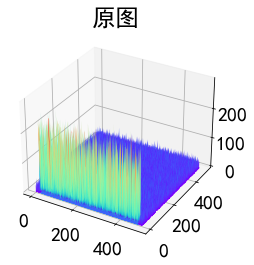

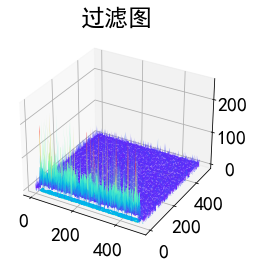

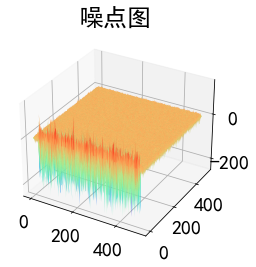

In [127]:
def img_to_3D(img, title):
    from matplotlib.ticker import LinearLocator, FormatStrFormatter
    import matplotlib

    matplotlib.rcParams['font.family']='SimHei' # 黑体 STSong
    matplotlib.rcParams["font.size"] =20
    plt.rcParams['axes.unicode_minus']=False

    fig = plt.figure()  #定义新的三维坐标轴
    ax3 = plt.axes(projection='3d')

    ax3.plot_surface(X,Y, img, rstride = 1, cstride = 1,cmap='rainbow')
    ax3.contour(X, Y, img, offset=-2, cmap = 'rainbow')#绘制等高线
    plt.title(title)
    plt.show()

print('原有粗糙度：{0}'.format(np.mean(abs(noise.reshape(-1, 1)))))
print('现有粗糙度：{0}'.format(np.mean(abs((lena - lena_filtered).reshape(-1, 1)))))

img_to_3D(lena, '原图')
img_to_3D(lena_filtered, '过滤图')
img_to_3D(lena_filtered-lena, '噪点图')

现有粗糙度：8.482112884521484


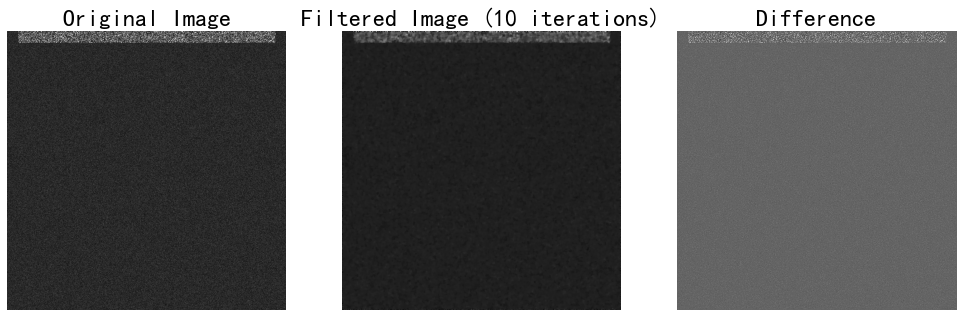

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (17,8))
axes[0].imshow(lena, cmap=cm.Greys_r)
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[1].imshow(lena_filtered, cmap=cm.Greys_r)
axes[1].set_title('Filtered Image (10 iterations)')
axes[1].set_axis_off()

axes[2].imshow(lena - lena_filtered, cmap=cm.Greys_r)
axes[2].set_title('Difference')
axes[2].set_axis_off()

print('现有粗糙度：{0}'.format(np.mean(abs((lena - lena_filtered).reshape(-1, 1)))))

# 以下废弃

In [ ]:
def img_to_3D(img, title):
    from matplotlib.ticker import LinearLocator, FormatStrFormatter
    import matplotlib

    matplotlib.rcParams['font.family']='SimHei' # 黑体 STSong
    matplotlib.rcParams["font.size"] =20
    plt.rcParams['axes.unicode_minus']=False

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # lena, lena_filtered
    surf = ax.plot_surface(X, Y, img, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-10, 255)  # z轴的取值范围
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)
    plt.show()

print('现有粗糙度：{0}'.format(np.mean(abs((lena - lena_filtered).reshape(-1, 1)))))

img_to_3D(lena, '原图')
img_to_3D(lena_filtered, '过滤图')
img_to_3D(lena_filtered-lena, '噪点图')